### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### EDA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


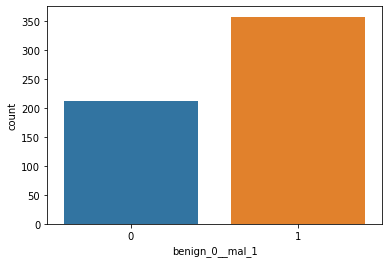

In [5]:
sns.countplot(x='benign_0__mal_1',data=df);

We have good proportion of observations of both the target variables with higher cases of malignant tumor

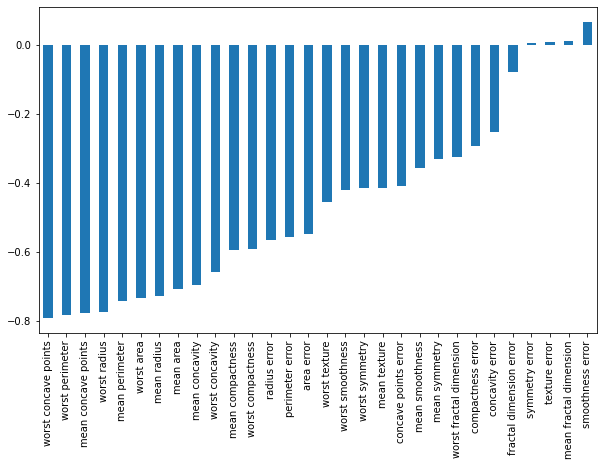

In [6]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

- Worst concave points, worst perimeter, mean concave points and worst radius are the top 4 attributes that are negatively correlated with the target variable
- Overall good correlations of variables with the target are indicative of achieving good modelling

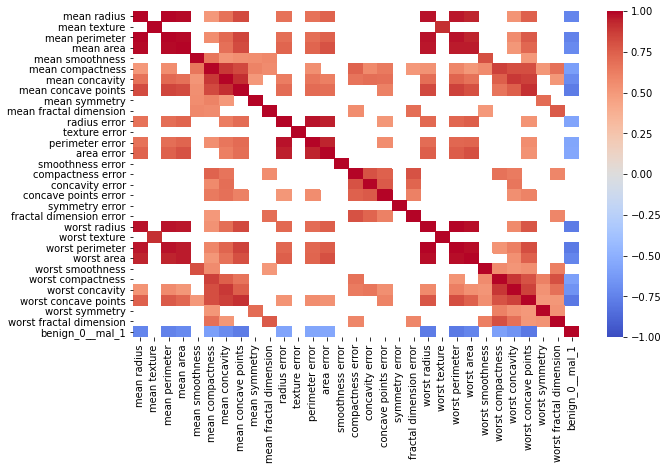

In [9]:
corr = df.corr()
corr_filter = corr.where(lambda x: (x>0.5) | (x<(-0.5))) #filtering strong correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_filter,cmap='coolwarm',vmin=-1,vmax=1);

### Scaling and Train-Val Split

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Building and training the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Dropout layers help us in preventing overfitting of the data

In [15]:
model = Sequential()

model.add(Dense(30,activation='relu')) #since we have 30 variables in X
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #here we want the model to return probabilities of having a benign tumor

model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_val,y_val))

Epoch 1/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6922 - val_loss: 0.6669
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6552 - val_loss: 0.6327
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6192 - val_loss: 0.5928
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5791 - val_loss: 0.5494
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5358 - val_loss: 0.5016
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4917 - val_loss: 0.4521
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4423 - val_loss: 0.4060
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3983 - val_loss: 0.3588
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3571 - val_loss: 0.3228
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3204 - val_loss: 0.2844
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.1007
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0532 - val_loss: 0.0911
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0970
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0530 - val_loss: 0.0972
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.0972
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0501 - val_loss: 0.0921
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.0940
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.1028
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.0977
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0934


14/14 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1094
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.1115
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.1080
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.1061
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0367 - val_loss: 0.1063
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.1054
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.1062
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.1038
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.1125
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.1088
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.1209
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.1173
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.1163
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.1170
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1226
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1171
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0311 - val_loss: 0.1280
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0282 - val_loss: 0.1180
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.1228
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.1207
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.1445
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.1229
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.1317
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0239 - val_loss: 0.1204
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.1305
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.1351
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.1350
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.1226
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.1360
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.1281
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.1350
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.1407
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0239 - val_loss: 0.1275
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.1409
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.1347
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.1351
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.1337
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.1355
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.1346
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.1359
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.1601
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1571
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.1896
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1563
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.1854
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.1795
Epoch 494/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0170 - val_loss: 0.1564
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.1933
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.1569
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.1703
Epo

14/14 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.2111
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.2148
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.2115
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.2171
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.2129
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2121
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.2175
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.2122
Epoch 577/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0088 - val_loss: 0.2260
Epoch 578/600
14/14 [==============================] - ETA: 0s - loss: 0.005 - 0s 4ms/step - loss: 0.0085

<AxesSubplot:>

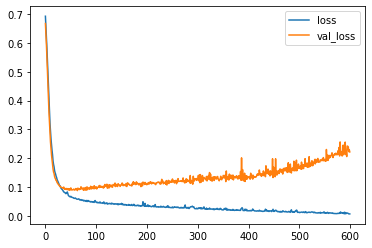

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

- The above graph shows that we are overfitting the model to training data due to higher number of epochs. Our ideal number of epochs seems to be somewhere less than 100 
- Let us try and use early stopping using callbacks to stop training the model sooner and thus avoid overfitting

In [20]:
#Using the same model building commands as before
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) 
#patience tells the model to wait and monitor val_loss for that many number of epochs before stopping

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6595 - val_loss: 0.6431
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6281 - val_loss: 0.6114
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5972 - val_loss: 0.5769
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5614 - val_loss: 0.5350
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5126 - val_loss: 0.4805
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4612 - val_loss: 0.4309
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4100 - val_loss: 0.3745
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3613 - val_loss: 0.3284
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3184 - val_loss: 0.2879
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2830 - val_loss: 0.2524
Epoch 11/

Because of our callback argument, the model training now stops at 76 epochs instead of training it for entire 600 epochs. This avoids overfitting and also reduces computational power required for the run

<AxesSubplot:>

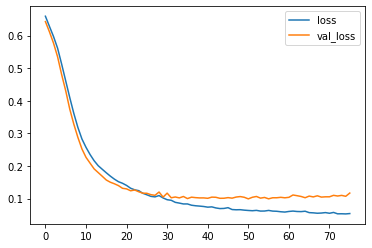

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

To avoid further overfitting, we can add dropout layers. It turns off certain percentage of neurons randomly for updating the weights and biases

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) #here we want the model to return probabilities of having a benign tumor

model.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6994 - val_loss: 0.6816
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6776 - val_loss: 0.6687
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6672 - val_loss: 0.6554
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6541 - val_loss: 0.6396
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6486 - val_loss: 0.6233
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.6061
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6099 - val_loss: 0.5806
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.5535
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5826 - val_loss: 0.5282
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5578 - val_loss: 0.5007
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 0.0842
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1029 - val_loss: 0.0784
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1113 - val_loss: 0.0773
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1091 - val_loss: 0.0811
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1337 - val_loss: 0.0885
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1123 - val_loss: 0.0785
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1019 - val_loss: 0.0766
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1136 - val_loss: 0.0805
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 0.0768
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1195 - val_loss: 0.0818


14/14 [==============================] - 0s 4ms/step - loss: 0.1008 - val_loss: 0.0722
Epoch 00164: early stopping


Now our model trains up to 164 epochs

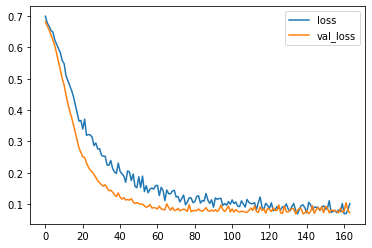

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

Now our model's performance has improved significantly thus minimizing overfitting

In [29]:
predictions = model.predict_classes(X_val)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



We get a very good performing model with an accuracy of 98%!